## CarDekho Used Car Price Prediction

### Building Machine Learning Model

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

Load the Dataset:

In [2]:
df=pd.read_csv(r"C:\Users\banup\Desktop\CarDekho Used Car Price Prediction\processed_car_data.csv")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df.head(3)

,manufacturer,model_name,model_year,body_type,fuel_type,transmission,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,insurance_type,seats,city,price_in_lakhs_(₹)
0,Maruti,Celerio,2015,Hatchback,Petrol,Manual,67.04,998.0,23.10,120000.0,3,third_party_insurance,5,bangalore,4.00
1,Ford,Ecosport,2018,SUV,Petrol,Manual,121.31,1497.0,17.00,32706.0,2,Comprehensive,5,bangalore,8.11
2,Tata,Tiago,2018,Hatchback,Petrol,Manual,84.00,1199.0,23.84,11949.0,1,Comprehensive,5,bangalore,5.85


In [3]:
#Shape
print("--- Shape of the dataset:",df.shape)
#Checking for NaN values
print("--- Null values:\n",df.isna().sum())

--- Shape of the dataset: (8115, 15)
--- Null values:
 manufacturer          0
model_name            0
model_year            0
body_type             0
fuel_type             0
transmission          0
power_(bhp)           0
engine_(cc)           0
mileage               0
kilometers            0
previous_owners       0
insurance_type        0
seats                 0
city                  0
price_in_lakhs_(₹)    0
dtype: int64


Summary of the data:

In [4]:
#Summary of the data
df.describe()

,model_year,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,seats,price_in_lakhs_(₹)
count,8115.000000,8115.000000,8115.000000,8115.000000,8.115000e+03,8115.000000,8115.000000,8115.000000
mean,2016.483426,105.418429,1433.189402,19.049760,5.911076e+04,1.359458,5.205052,9.615798
std,3.896658,46.277833,471.335756,3.515612,7.494361e+04,0.638937,0.663384,14.264777
min,1985.000000,34.200000,624.000000,7.080000,0.000000e+00,0.000000,2.000000,0.201610
25%,2014.000000,78.900000,1197.000000,17.000000,3.030850e+04,1.000000,5.000000,4.000000
50%,2017.000000,88.700000,1248.000000,18.900000,5.400000e+04,1.000000,5.000000,6.070000
75%,2019.000000,118.880000,1498.000000,21.400000,8.000000e+04,2.000000,5.000000,9.500000
max,2023.000000,576.630000,5000.000000,28.400000,5.500000e+06,5.000000,10.000000,415.000000


In [5]:
df.head(1)

,manufacturer,model_name,model_year,body_type,fuel_type,transmission,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,insurance_type,seats,city,price_in_lakhs_(₹)
0,Maruti,Celerio,2015,Hatchback,Petrol,Manual,67.04,998.0,23.1,120000.0,3,third_party_insurance,5,bangalore,4.0


### ---------------------------Exploratory Data Analysis (EDA)---------------------------

Here, we are going to build a model to predict the selling price of the cars by using the available features variables. 
  - Feature variables :
      - model_year
      - body_type
      - fuel_type
      - transmission
      - power_(bhp)
      - engine_(cc)
      - mileage
      - kilometers
      - previous_owners
      - insurance_type
      - seats
      - city
  - Target variable:
       - price_in_lakhs_(₹)

### Relationship between Feature  Variables and Target (Price)


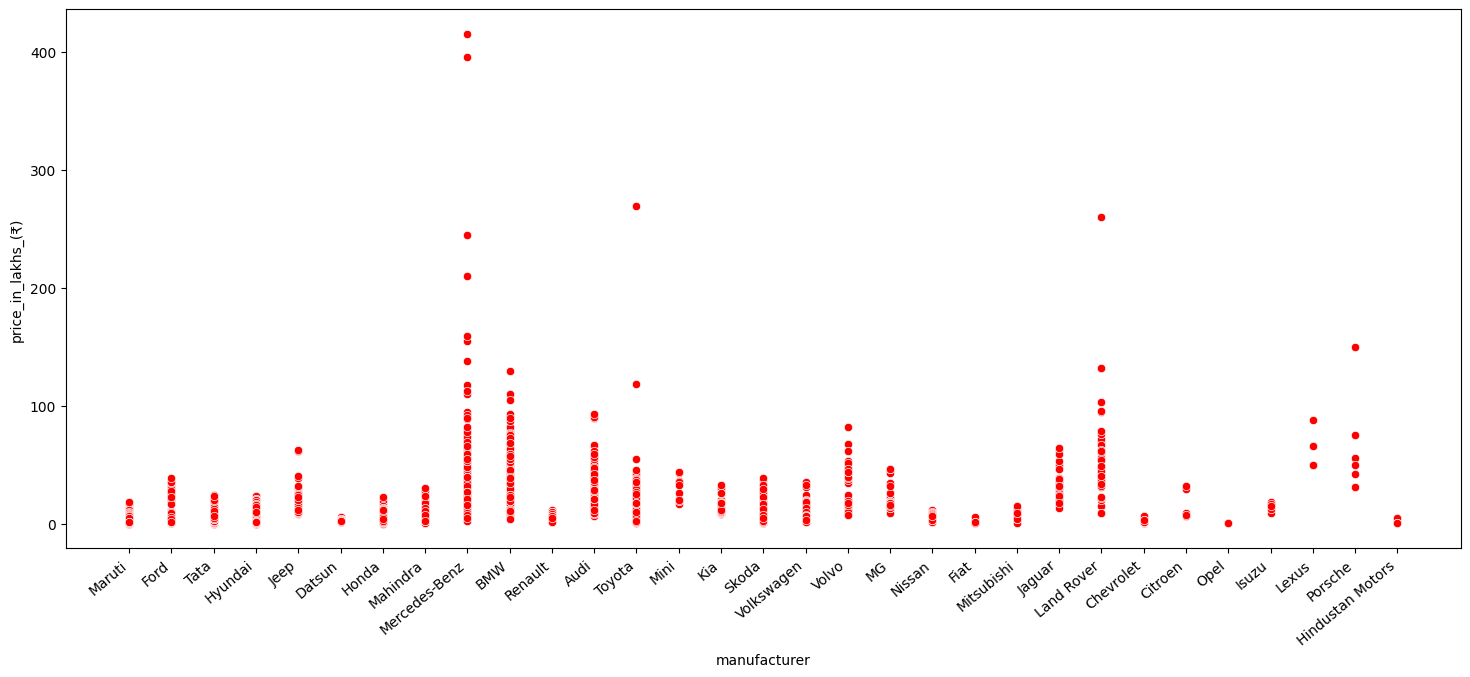

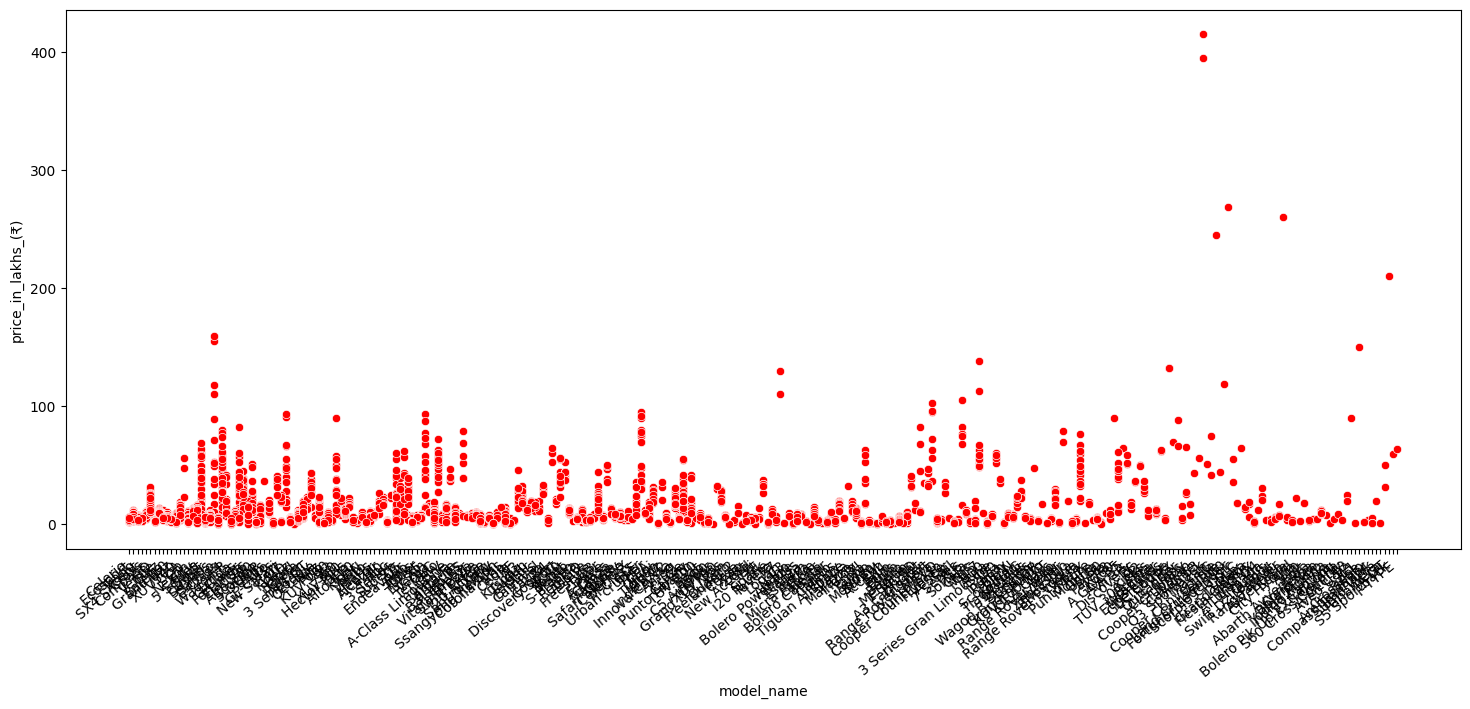

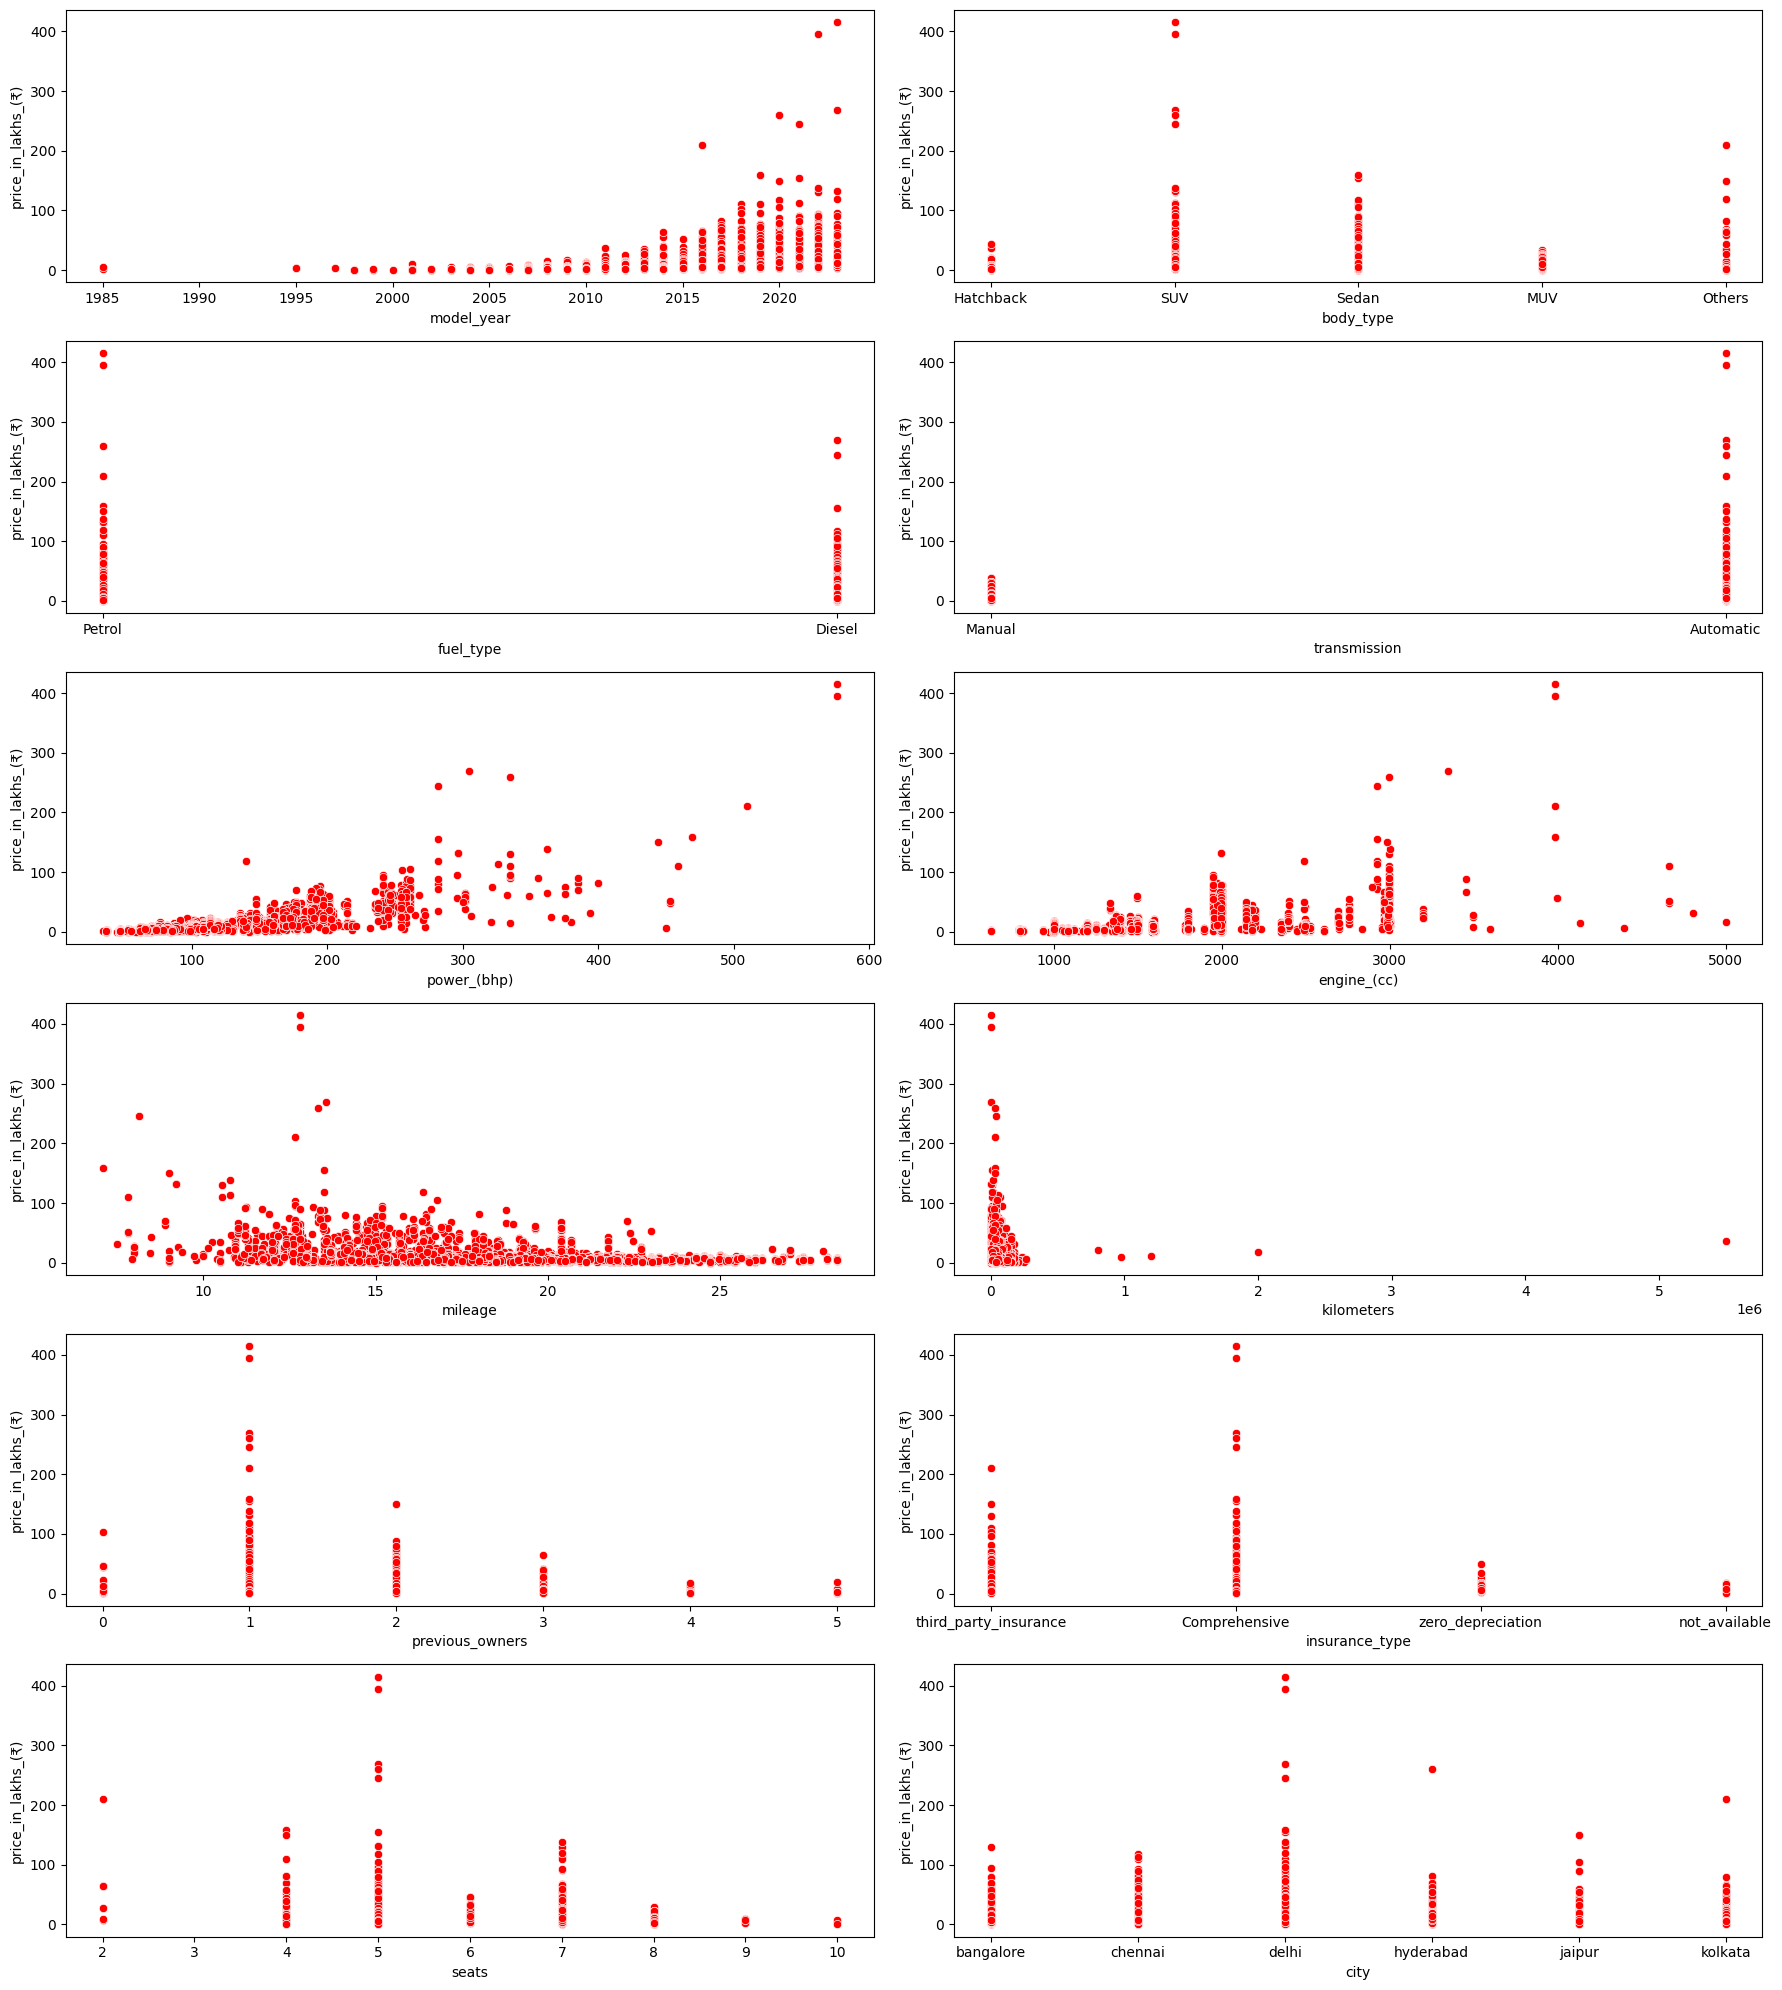

In [6]:

#Plotting the graph betwwen feature variable and target
columns=['model_year', 'body_type', 'fuel_type', 'transmission', 'power_(bhp)', 'engine_(cc)', 'mileage', 'kilometers', 'previous_owners', 'insurance_type', 'seats', 'city']
target="price_in_lakhs_(₹)"
#manufacturer
plt.figure(figsize=(18, 7)) 
ax=sns.scatterplot(x=df["manufacturer"],y=df[target],color="red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()
#model_year
plt.figure(figsize=(18, 7)) 
ax=sns.scatterplot(x=df["model_name"],y=df[target],color="red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()
#Other variables 
position=1
plt.figure(figsize=(18, 20)) 
for col in columns:
        plt.subplot(6,2,position)
        sns.scatterplot(x=df[col],y=df[target],color="red")
        position+=1
plt.tight_layout()
plt.show()

INFERENCE :
-  Numerical Variables :
      *  Kilometers vs Price:
         - A basic domain knowledge in used vehicle sector is ,the vehicles which have less runned  kilometers, will be priced higher than the more kilometers runned vehicle.Here in this dataset also, the cars with less runned kilometers are priced higher.But not all cars prices having less kilometers are higher,it purely depends upon other factors of car too.
      *  Power vs Price:
         - As like Model year, the same scenario is in power.The price of the car gets increased with increase in engine power.There is a positive correlation occurs between power and price.
      * Mileage vs Price:
         - Mileage consideration of cars is a crucial factor in case of buying a new or a used car.But in luxury segment cars ,the other features than mileage are considered in a business.Here in this dataset,the car price is considerably low when increase in mileage,because of some features of the car includes comfort,power,safety and so on.
-  Categorical Variables:
      * Manufacturer vs selling price:
         - Mercedez ,BMW, LandRover cars are priced high beacuse they belong to high end luxury segment cars.
      * Model year vs Price:
         - It is noticable ,when price of the car gets  increased with increase in year,which explicitly informs that when age of the car is low the price of the car becomes high,Which indicates positive correlation.
      * Transmission vs Price:
         - Automatic transmission car prices are high when compared to Manual Transmission Cars
      * Fuel Type vs Price:
         - Petrol varient cars are priced high tha Diesel cars
      * Body type vs Price:
         - Sedan Varient cars are priced higher ,Where as MUV varients are price lower
      * Previous Owners vs Price:
         - The price of the car is found to be high for single(1) previous owner.We should not conclude this as final, since cars zero(0) owners are low,beacuse it purely depend on the faetures of the car.
      * Insurance vs Price:
         - Third part insurance and Comprehensive insurance policy cars have equal selling prices 
      * Seats vs price:
         - 5 seater and 7 seater cars selling prices are high where as 2 ,9 and 10 seater cars comparatively are low.

### Finding and Handling Outliers in Numerical Data

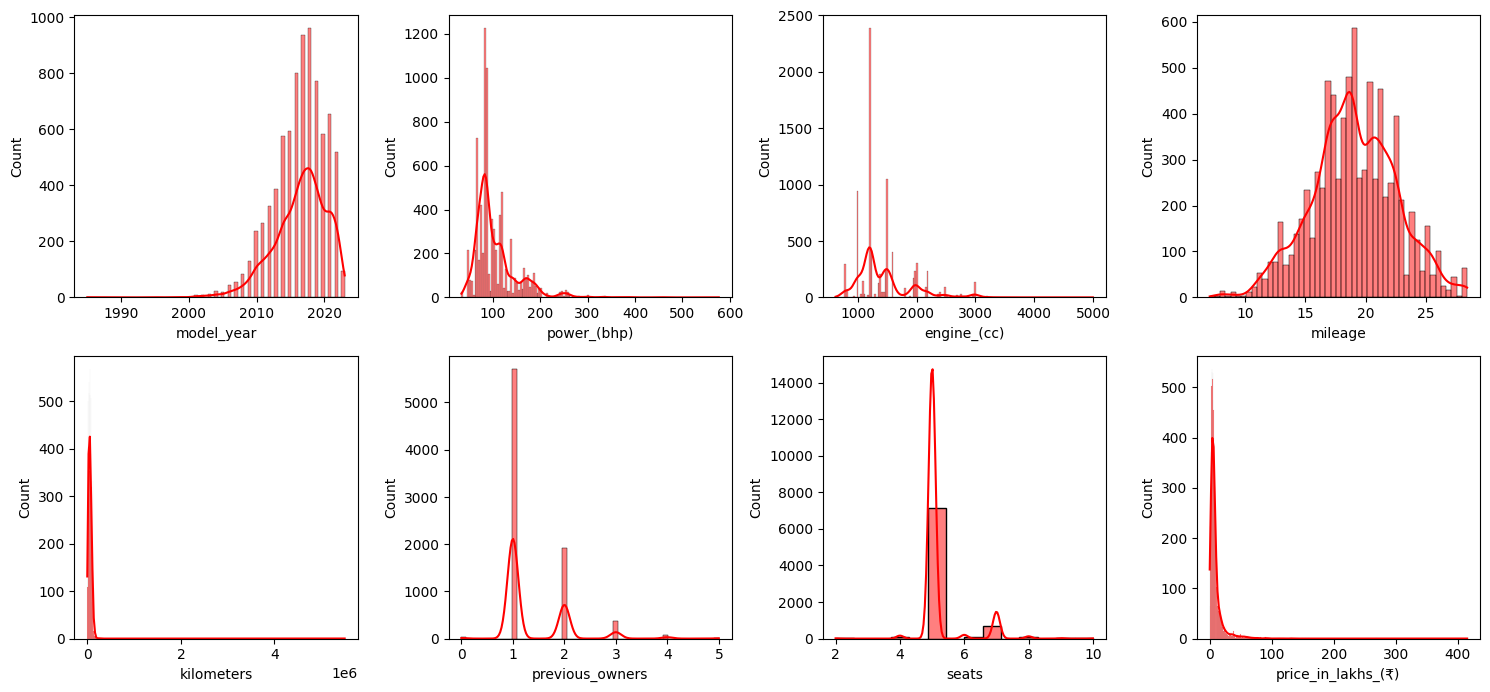

In [7]:
numerical_variables=df.select_dtypes(include=["int","float"])
num_columns=numerical_variables.columns.to_list()
#---------------------------------------------------------------------------------------------------
#Univariate analysis by using histplot
position = 1
plt.figure(figsize=(15, 10))  
for col in num_columns:
    plt.subplot(3, 4, position)
    sns.histplot(data=df[col], color='red', kde=True)
    position += 1
plt.tight_layout()  
plt.show()

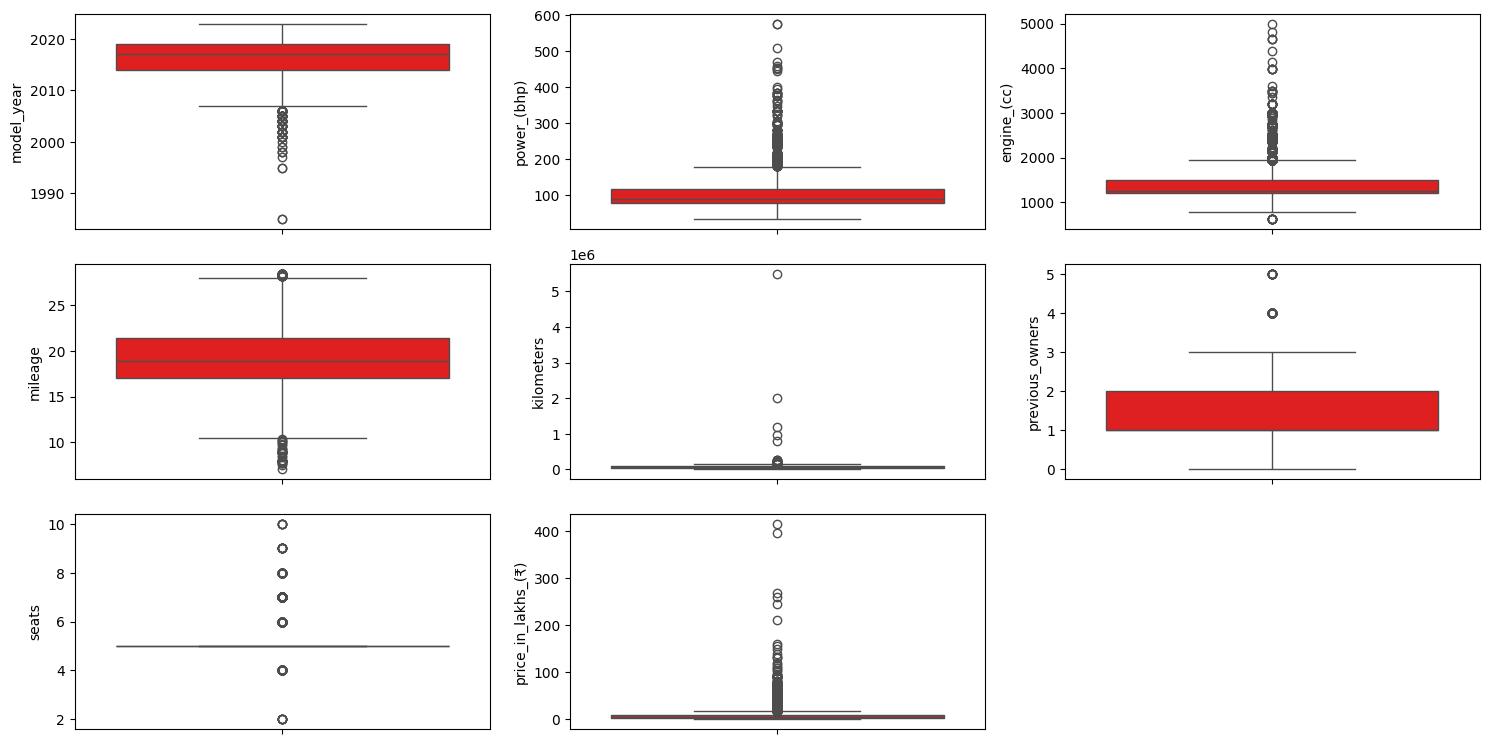

In [8]:
#Checking for outliers by using Box plots
plt.figure(figsize=(15, 10))  
position = 1
for col in num_columns:
    plt.subplot(4, 3, position)
    sns.boxplot(data=df[col], color='red')
    position += 1
plt.tight_layout()  
plt.show()

In [9]:
df.describe()

,model_year,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,seats,price_in_lakhs_(₹)
count,8115.000000,8115.000000,8115.000000,8115.000000,8.115000e+03,8115.000000,8115.000000,8115.000000
mean,2016.483426,105.418429,1433.189402,19.049760,5.911076e+04,1.359458,5.205052,9.615798
std,3.896658,46.277833,471.335756,3.515612,7.494361e+04,0.638937,0.663384,14.264777
min,1985.000000,34.200000,624.000000,7.080000,0.000000e+00,0.000000,2.000000,0.201610
25%,2014.000000,78.900000,1197.000000,17.000000,3.030850e+04,1.000000,5.000000,4.000000
50%,2017.000000,88.700000,1248.000000,18.900000,5.400000e+04,1.000000,5.000000,6.070000
75%,2019.000000,118.880000,1498.000000,21.400000,8.000000e+04,2.000000,5.000000,9.500000
max,2023.000000,576.630000,5000.000000,28.400000,5.500000e+06,5.000000,10.000000,415.000000


Variables with Outliers:
  - model_year
  - power_(bhp)	
  - engine_(cc)
  - mileage	
  - kilometers
  - previous_owners	
  - seats
  - price_in_lakhs_(₹)
  
By observation , all feature variables and the target variables are having outliers.We need to remove or handle the outliers based on the data.

Dropping the Outliers :

- Removing the Outliers  (Manually)

In [12]:

#Removing the outlier in model_year
df=df[~(df["model_year"]<=2001)]
#------------------------------------------------------
#Removing the outliers in  power_(bhp)	
df=df[~(df["power_(bhp)"]>=300)]
df=df[~(df["power_(bhp)"]<40)]
#------------------------------------------------------
#Removing the outliers in  engine_(cc)
df=df[~(df["engine_(cc)"]>=3000)]
#------------------------------------------------------
##Removing the outliers in  kilometers
df=df[~(df["kilometers"]>=160000)]
#------------------------------------------------------
#Removing Outliers in prices
df=df[~(df["price_in_lakhs_(₹)"]>=40)]
#------------------------------------------------------
#Removing Outliers in seats
# df=df[~(df["seats"]>8)]
# print(df.shape)
#--------------------------------------------------------
#Resetting the index
df.reset_index(inplace=True)

(8095, 15)
(8025, 15)
(8003, 15)
(7962, 15)
(7753, 15)


In [13]:
#Resetting the index
df.reset_index(inplace=True,drop=True)
df.drop(columns=["index"],inplace=True)

In [14]:
# #Removining the ouliers
# for col in num_columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

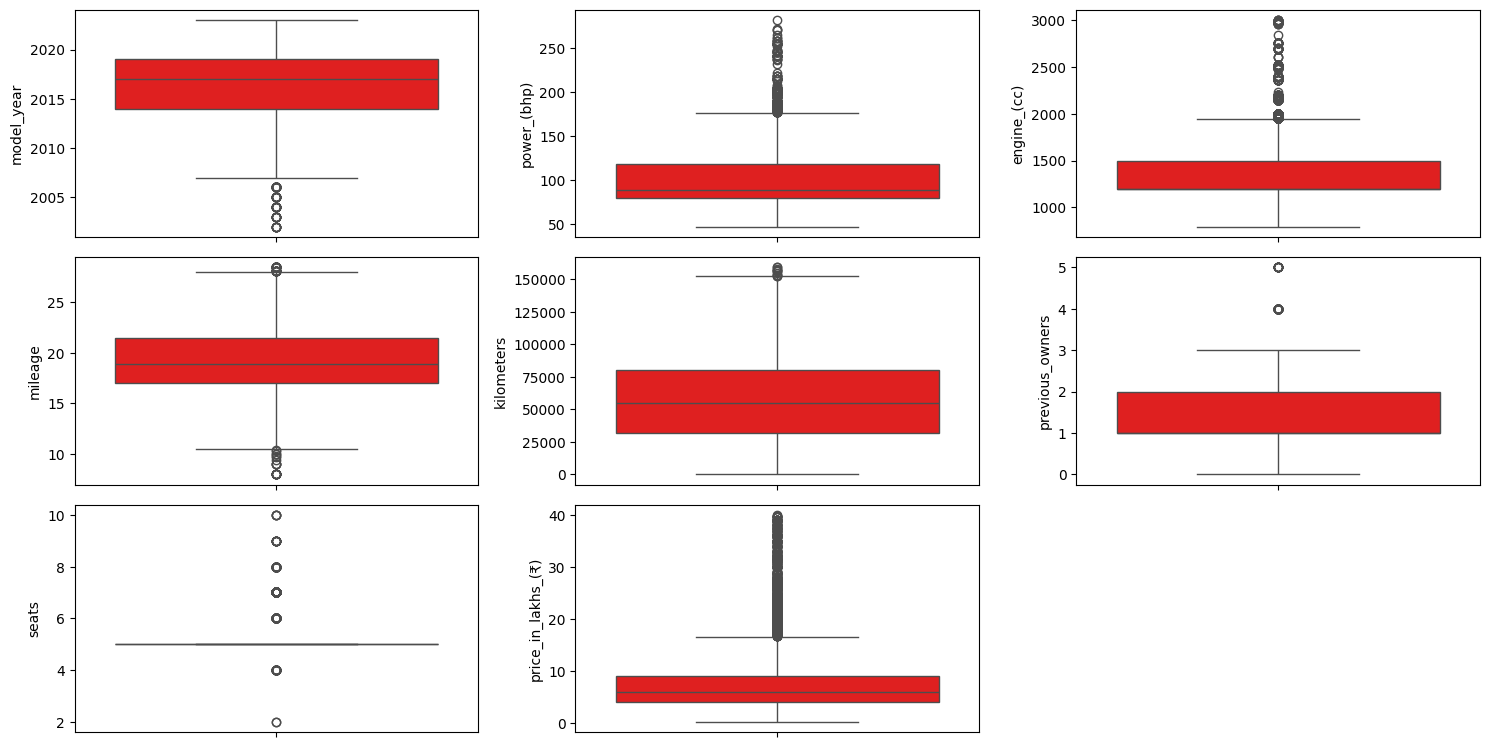

In [15]:
#Checking outliers by using Box plots
plt.figure(figsize=(15, 10))  
position = 1
for col in num_columns:
    plt.subplot(4, 3, position)
    sns.boxplot(data=df[col], color='red')
    position += 1
plt.tight_layout()  
plt.show()

 - Note : i haven't removed the outliers completely even there are some outliers present.Since the dataset size is less and the numerical columns have diverse distribution.Let's try to build the model with this and see the metrics.

Distribution of Numerical Variables and Target after removing outliers

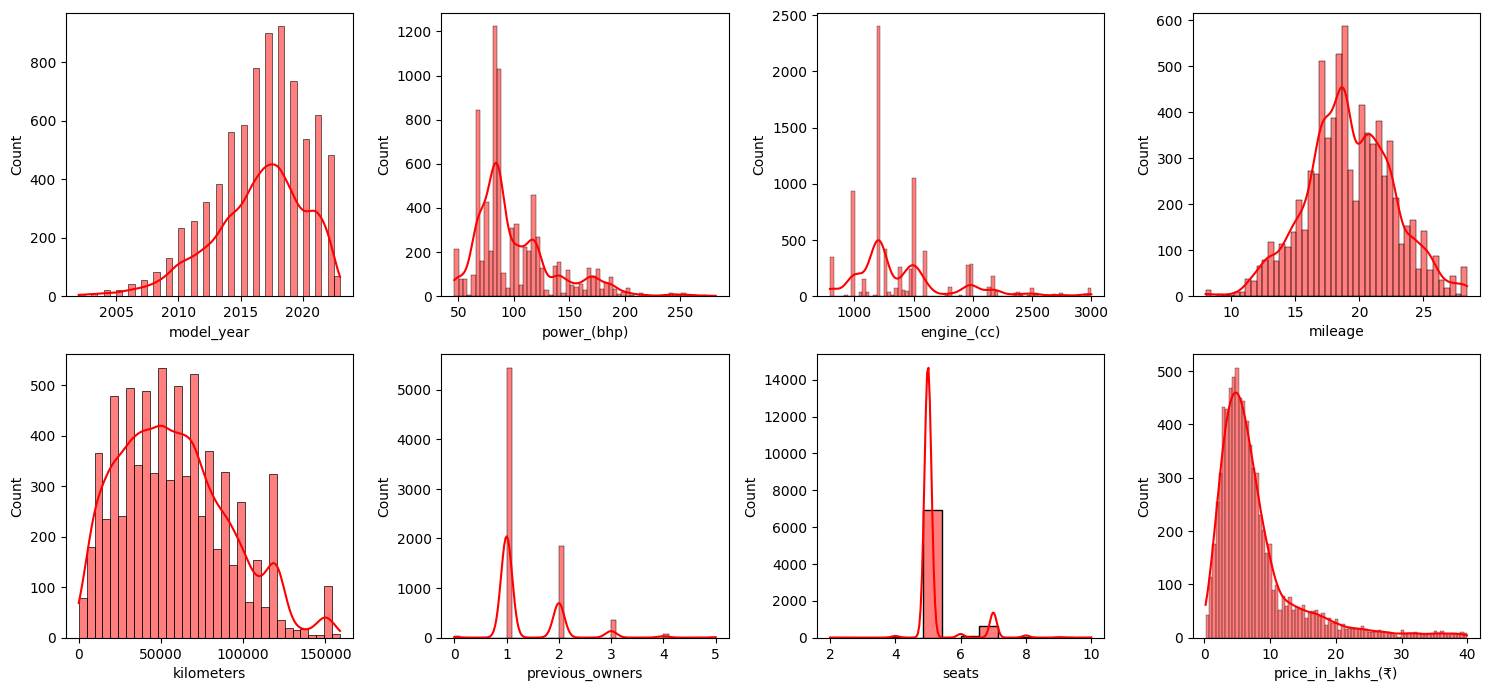

In [16]:
position = 1
plt.figure(figsize=(15, 10))  
for col in num_columns:
    plt.subplot(3, 4, position)
    sns.histplot(data=df[col], color='red', kde=True)
    position += 1
plt.tight_layout()  
plt.show()

In [17]:
df.describe()

,model_year,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,seats,price_in_lakhs_(₹)
count,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000,7753.000000
mean,2016.465884,100.573928,1394.922224,19.242162,58062.480330,1.360506,5.199794,7.766836
std,3.749944,36.025807,412.016291,3.380173,32971.895565,0.636176,0.638416,6.377361
min,2002.000000,46.300000,793.000000,8.000000,0.000000,0.000000,2.000000,0.201610
25%,2014.000000,78.900000,1197.000000,17.010000,31650.000000,1.000000,5.000000,3.950000
50%,2017.000000,88.500000,1199.000000,18.900000,54708.000000,1.000000,5.000000,5.990000
75%,2019.000000,117.600000,1498.000000,21.400000,80000.000000,2.000000,5.000000,8.990000
max,2023.000000,282.000000,2999.000000,28.400000,158945.000000,5.000000,10.000000,39.950000


###  Encoding the Non Numerical features

Frequency Encoding and Label Encoding are used encoding the non numerical columns

In [18]:
#Frequency encoding for manufacturer categories
#--------------------------------------------------------
frequency_1=df.groupby("manufacturer").size()/df.shape[0]
df["manufacturer"]=df["manufacturer"].replace(frequency_1.to_dict())
print(frequency_1.to_dict())

{'Audi': 0.01741261447181736, 'BMW': 0.014832967883399974, 'Chevrolet': 0.0096736747065652, 'Citroen': 0.0010318586353669547, 'Datsun': 0.009544692377144332, 'Fiat': 0.0038694698826260802, 'Ford': 0.03727589320263124, 'Hindustan Motors': 0.00025796465884173866, 'Honda': 0.1093770153488972, 'Hyundai': 0.20650070940281182, 'Isuzu': 0.0006449116471043467, 'Jaguar': 0.003095575906100864, 'Jeep': 0.01367212691861215, 'Kia': 0.01986327873081388, 'Land Rover': 0.002321681929575648, 'MG': 0.010060621694827809, 'Mahindra': 0.04772346188572166, 'Maruti': 0.2729266090545595, 'Mercedes-Benz': 0.018186508448342575, 'Mini': 0.001160840964787824, 'Mitsubishi': 0.001547787953050432, 'Nissan': 0.00993163936540694, 'Opel': 0.000386946988262608, 'Renault': 0.03972655746162776, 'Skoda': 0.020250225719076486, 'Tata': 0.05043209080355991, 'Toyota': 0.03830775183799819, 'Volkswagen': 0.03675996388494776, 'Volvo': 0.0032245582355217334}


In [19]:
#Frequency encoding for transmission categories
#---------------------------------------------------
frequency_2=df.groupby("transmission").size()/df.shape[0]
df["transmission"]=df["transmission"].replace(frequency_2.to_dict())
print(frequency_2.to_dict())

{'Automatic': 0.2539662066296917, 'Manual': 0.7460337933703083}


In [20]:
#Frequency Encoding for the body_type categories
#-----------------------------------------------------
frequency_3=df.groupby("body_type").size()/df.shape[0]
df["body_type"]=df["body_type"].replace(frequency_3.to_dict())
print(frequency_3.to_dict())

{'Hatchback': 0.4390558493486392, 'MUV': 0.041661292402940794, 'Others': 0.0034825228943634722, 'SUV': 0.25757771185347605, 'Sedan': 0.2582226235005804}


In [21]:
#Frequency encoding for insurance_type categories
#--------------------------------------------------------
frequency_4=df.groupby("insurance_type").size()/df.shape[0]
df["insurance_type"]=df["insurance_type"].replace(frequency_4.to_dict())
print(frequency_4.to_dict())

{'Comprehensive': 0.3705662324261576, 'not_available': 0.0273442538372243, 'third_party_insurance': 0.5648136205339869, 'zero_depreciation': 0.03727589320263124}


In [22]:
#Frequency Encoding for the city categories
#-------------------------------------------------------
frequency_5=df.groupby("city").size()/df.shape[0]
df["city"]=df["city"].replace(frequency_5.to_dict())
print(frequency_5.to_dict())

{'bangalore': 0.1800593318715336, 'chennai': 0.17232039210628144, 'delhi': 0.16471043467045016, 'hyderabad': 0.18199406681284663, 'jaipur': 0.13220688765639108, 'kolkata': 0.1687088868824971}


In [23]:
#Frequency encoding for fuel_type categories
#--------------------------------------------------------
frequency_6=df.groupby("fuel_type").size()/df.shape[0]
df["fuel_type"]=df["fuel_type"].replace(frequency_6.to_dict())
print(frequency_6.to_dict())

{'Diesel': 0.31523281310460466, 'Petrol': 0.6847671868953953}


In [24]:
#Frequency encoding for model_name categories
#--------------------------------------------------------
frequency_7=df.groupby("model_name").size()/df.shape[0]
df["model_name"]=df["model_name"].replace(frequency_7.to_dict())
print(frequency_7.to_dict())

{'1 Series': 0.00025796465884173866, '3 DOOR': 0.00012898232942086933, '3 Series': 0.004256416870888688, '3 Series GT': 0.0012898232942086935, '5 DOOR': 0.00012898232942086933, '5 Series': 0.002966593576679995, '6 Series': 0.00025796465884173866, 'A Class': 0.000386946988262608, 'A-Class Limousine': 0.00025796465884173866, 'A-Star': 0.001547787953050432, 'A3': 0.002192699600154779, 'A3 cabriolet': 0.00012898232942086933, 'A4': 0.003353540564942603, 'A6': 0.003740487553205211, 'Abarth Avventura': 0.00012898232942086933, 'Accent': 0.0012898232942086935, 'Alcazar': 0.002321681929575648, 'Alto': 0.006449116471043467, 'Alto 800': 0.020121243389655617, 'Alto K10': 0.010576551012511285, 'Altroz': 0.004256416870888688, 'Alturas G4': 0.000386946988262608, 'Amaze': 0.022184960660389528, 'Ambassador': 0.00025796465884173866, 'Ameo': 0.003740487553205211, 'Aria': 0.00012898232942086933, 'Aspire': 0.0020637172707339093, 'Astor': 0.001547787953050432, 'Aura': 0.0019347349413130401, 'Aveo': 0.0002579

- Since frequency encoding for the "model_name" is not right choice to encode,because there are many different model names are having unique  number of presence in this dataset.So it will give same frequency number to the different model names.Let's check the correlation with the target and make the decision.

### Checking for Correlation  between the Feature variables and the Target Variable

- Pearson Correlation is used for checking correlation.

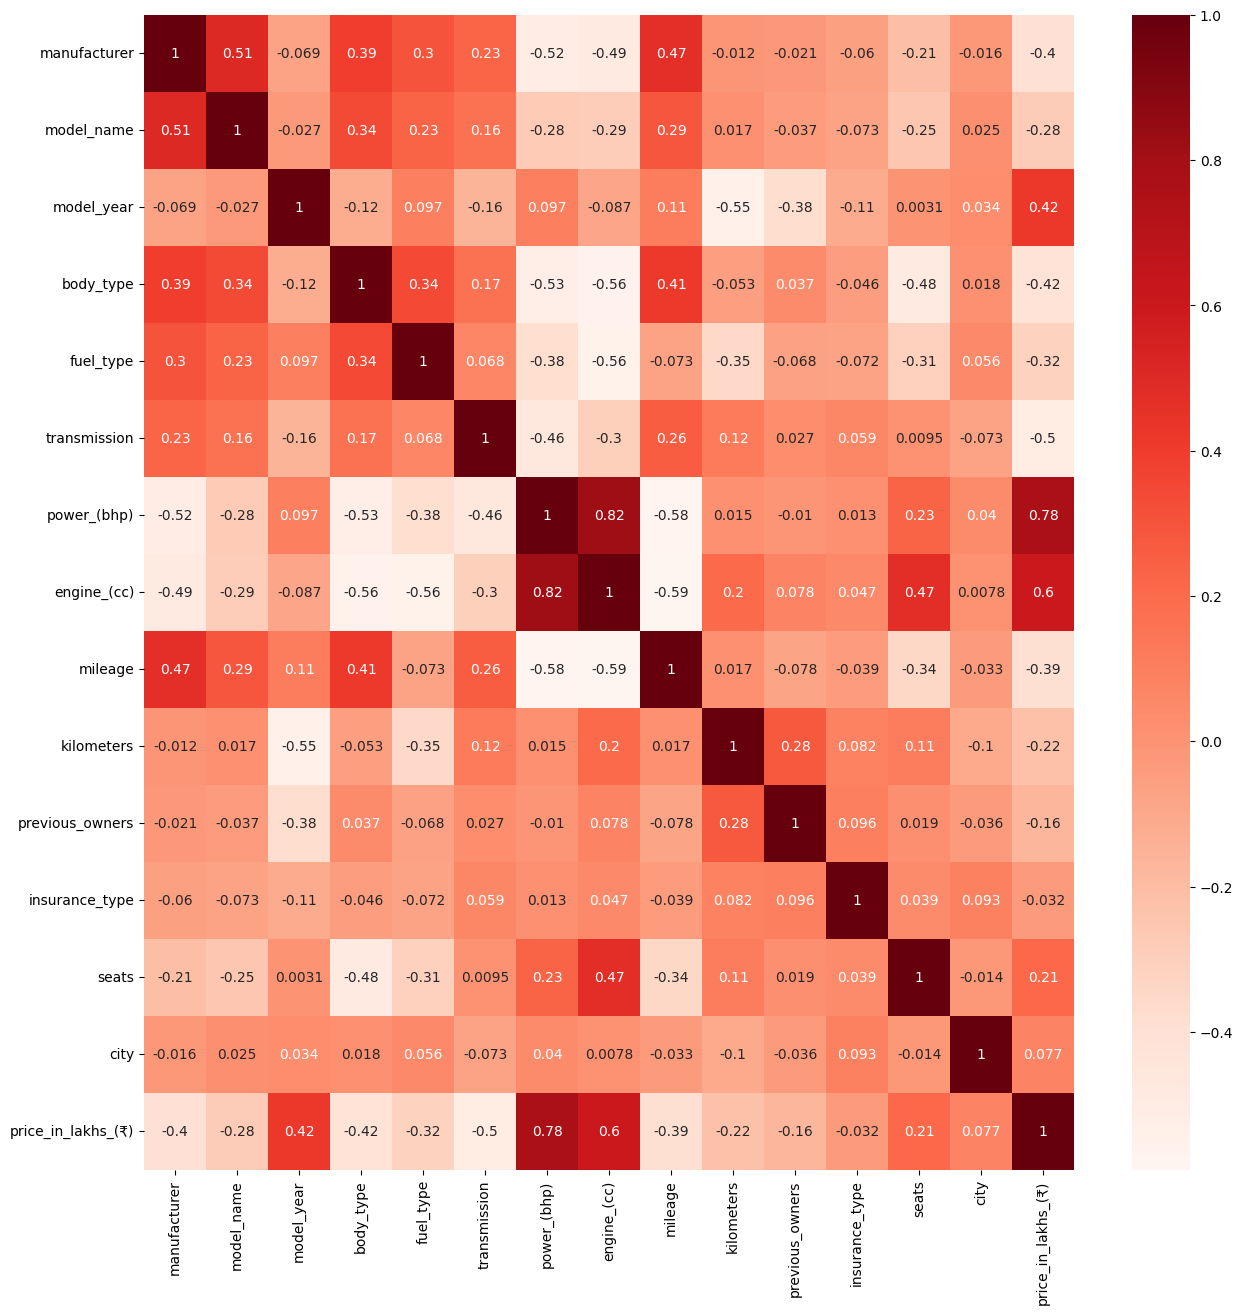

In [25]:
pearson_correlation=df.corr()
#-------------------------------------------
#plotting the heatmap to visualize correlation
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True,cmap="Reds")
plt.show()

### Insights from Pearson Correlation:

- "power_(bhp)" and "engine_(cc)" are highly correlated to each otherand also these features are also have POSITIVE CORRELATION with the selling price .So we can choose any one feature among two for building ML model,here i can take "power_(bhp)" because it has high correlation than "engine_(cc)".
- "manufacturer","model_year,"body_type","fuel_type","transmission"and "mileage", are having GOOD correlation with the price.
- "city","insurance_type" and "previous_owners" are having very LOW correlation with the target.
     - Highest Correlation with the target is "power_(bhp)". (+ve correlation)
     - Lowest Correlation with the Target is "insurance_type".(-ve correlation)

In [26]:
df.head(3)

,manufacturer,model_name,model_year,body_type,fuel_type,transmission,power_(bhp),engine_(cc),mileage,kilometers,previous_owners,insurance_type,seats,city,price_in_lakhs_(₹)
0,0.272927,0.017929,2015,0.439056,0.684767,0.746034,67.04,998.0,23.10,120000.0,3,0.564814,5,0.180059,4.00
1,0.037276,0.021282,2018,0.257578,0.684767,0.746034,121.31,1497.0,17.00,32706.0,2,0.370566,5,0.180059,8.11
2,0.050432,0.011221,2018,0.439056,0.684767,0.746034,84.00,1199.0,23.84,11949.0,1,0.370566,5,0.180059,5.85


### ------------------------------Machine Learning Model--------------------------------

Feature selection :

- Here i have choosen "manufacturer","model_year","body_type","fuel_type","transmission","power_(bhp)","mileage", "kilometers" as feature variables and"price_in_lakhs_(₹)" as target variable  for building the machine learning model .

In [27]:
#importing necessary Libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

Splitting the datasets for training and testing :

In [28]:
#Feature variables(X)
X=df[["manufacturer","model_year","body_type","fuel_type","transmission","power_(bhp)","mileage", "kilometers"]]
#Target Variable(y)
y=df["price_in_lakhs_(₹)"]

In [29]:
X.head()

,manufacturer,model_year,body_type,fuel_type,transmission,power_(bhp),mileage,kilometers
0,0.272927,2015,0.439056,0.684767,0.746034,67.04,23.10,120000.0
1,0.037276,2018,0.257578,0.684767,0.746034,121.31,17.00,32706.0
2,0.050432,2018,0.439056,0.684767,0.746034,84.00,23.84,11949.0
3,0.206501,2014,0.258223,0.684767,0.746034,81.86,19.10,17794.0
4,0.272927,2015,0.257578,0.315233,0.746034,88.50,23.65,60000.0


Model Selection :

-  The model that  i have choosen are "Random forest Regressor" and "XGBoost Regressor"(Gradient Boosting Algorithm)because these model can perform well for non linear  and also the feature variables containing numerical and categorical data.

In [30]:
#Importing the models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [31]:
#Random Forest Regressor 
rf_regressor=RandomForestRegressor(random_state=42)
#XGBoost Regressor 
xgb_regressor = xgb.XGBRegressor(random_state=42)

---------------------------------------------------- Cross Validation -----------------------------------------------------

- K-Fold cross validation is done to ensure the same propotion of  data is used for training and testing inorder to improve the model accuracy.

In [32]:
#importing the kfold cross validation 
from sklearn.model_selection import cross_val_score, KFold

- Random Forest Regressor

In [33]:

k_fold = KFold(n_splits=5, shuffle=True, random_state=42) #number of folds=5
#cross validation scores
rf_regressor_cv_scores = cross_val_score(rf_regressor, X, y, cv=k_fold,scoring='r2')
#--------------------------------------------------------------------------------------------------------------
print("Cross-validation scores of rf_regressor:", rf_regressor_cv_scores)
print("Mean of r2_score:", rf_regressor_cv_scores.mean())
print("Standard Deviation of r2_score:", rf_regressor_cv_scores.std())

Cross-validation scores of rf_regressor: [0.91605719 0.89698064 0.92677645 0.91127436 0.91491251]
Mean of r2_score: 0.9132002303049855
Standard Deviation of r2_score: 0.009614486723303294


- XGBoost Regressor

In [34]:
#cross validation scores
xgboost_regressor_cv_scores = cross_val_score(xgb_regressor, X, y, cv=k_fold,scoring='r2')
#--------------------------------------------------------------------------------------------------------------
print("Cross-validation scores of xgboost_regressor:", xgboost_regressor_cv_scores)
print("Mean of r2_score:", xgboost_regressor_cv_scores.mean())
print("Standard Deviation of r2_score:", rf_regressor_cv_scores.std())

Cross-validation scores of xgboost_regressor: [0.92847216 0.89644352 0.92654804 0.9144656  0.93115229]
Mean of r2_score: 0.9194163227868616
Standard Deviation of r2_score: 0.009614486723303294


Inference:
 - cross validation results are good in both the models with good mean and very low standard deviation.
 - The cross validation scores for both  models are almost similar. 

---------------------------------------------------- Train Test Split -----------------------------------------------------

In [35]:
from sklearn.model_selection import train_test_split
#Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyper Parameter Tunning :
  - Hyper parameter tunning is done to improve the model performance by selecting the best input parameters.
  - "GrirdSearchCV" is used for hyper parameter tunning.

In [37]:
from sklearn.model_selection import GridSearchCV

- Random Forest Regressor:

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],    
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]        
}
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_regressor = grid_search.best_estimator_
test_score = best_rf_regressor.score(X_test, y_test)
#---------------------------------------------------------------
print("Best parameters of rf_regressor:", grid_search.best_params_)
print("Test Score :", test_score)
#------------------------------------------------------------------------
#Evaluation Metrics

y_pred = best_rf_regressor.predict(X_test)
#------------------------------------------------------------------------
print("-"*100)
#------------------------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
#------------------------------------------------------------------------
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

Best parameters of rf_regressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Score : 0.916827303917163
----------------------------------------------------------------------------------------------------
Mean Squared Error: 3.673097720179118
Mean Absolute Error: 1.1182043468265461
R2 Score: 0.916827303917163
Root Mean Squared Error: 1.9165327339179776


- XGBoost Regressor 

In [39]:
param_grid = {
    'n_estimators': [100, 200, 300],      
    'max_depth': [3, 6, 9],                
    'learning_rate': [0.01, 0.1, 0.2],     
    'subsample': [0.8, 0.9, 1.0],       
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'gamma': [0, 0.1, 0.2]                 
}
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_regressor = grid_search.best_estimator_
test_score = best_xgb_regressor.score(X_test, y_test)
#------------------------------------------------------------------------
print("Best parameters of xgb_regressor:", grid_search.best_params_)
print("Test Score :", test_score)
#-----------------------------------------------------------------------
#Evaluation Metrics

y_pred = best_xgb_regressor.predict(X_test)
#-----------------------------------------------------------------------
print("-"*100)
#-----------------------------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
#------------------------------------------------------------------------
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)


Best parameters of xgb_regressor: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
Test Score : 0.9252362307322404
----------------------------------------------------------------------------------------------------
Mean Squared Error: 3.301740154916939
Mean Absolute Error: 1.0854100357605487
R2 Score: 0.9252362307322404
Root Mean Squared Error: 1.8170691112109465


### Model Testing
 - On the basis of the scores ,"XGBoost Regressor" choosen as a right model for predicting the car price

   Actual_Price(₹)_(lakhs)  Predicted_Price(₹)_(lakhs)
0                     5.00                    4.885026
1                     3.76                    5.192409
2                     5.10                    4.493567
3                     7.50                    7.055357
4                     6.39                    7.478557


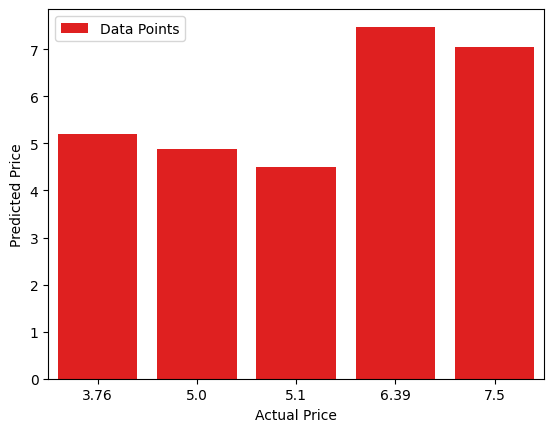

In [86]:
import numpy as np
#Taking Random samples from the datsets for  comparing actual price and predicted price
df_sample=df[["manufacturer","model_year","body_type","fuel_type","transmission","power_(bhp)","mileage", "kilometers","price_in_lakhs_(₹)"]]
random_sample=df_sample.sample(5)
actual_price=[]
predicted_price=[]

for index,row in random_sample.iterrows():
    sample_entry=row.values[0:-1].tolist()
    sample_entry_array = np.array(sample_entry).reshape(1, -1)
    predicted_value = best_xgb_regressor.predict(sample_entry_array)
    predicted_price.append(predicted_value[0])
    actual_price.append(row[-1])
#---------------------------------------------------------------------
#Creating a Dataframe of price
df_price=pd.DataFrame({"Actual_Price(₹)_(lakhs)":actual_price,"Predicted_Price(₹)_(lakhs)":predicted_price})
print(df_price)
#----------------------------------------------------------------------
#plotting the graph
sns.barplot(data=df_price, x='Actual_Price(₹)_(lakhs)', y='Predicted_Price(₹)_(lakhs)', color='red', label='Data Points')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Conclusion:
- The trained model decently predicts the selling price of the car with some variations.Some times there occurs huge variation in predicted price when comparing with actual price.In future the model will be fine tuned with large number of dataset and optimal feature variables and model parameters to decrease the error percentage.

### Saving the model
 - The trained model is saved by  using  "pickle" module.

In [81]:
import pickle
#Saving the XGBoost Regressor model
with open('xgb_regressor_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_regressor, f)